## Proyecto Final - Data Science
### Dataset: Life Expectancy (WHO)
### Alumno: Fernando Cucci (fernandocucci@gmail.com)
### Link GitHub: https://github.com/fernandocucci/coderhouse

## Tabla de Contenidos:
* Introducción
* Extracto
* Contexto Analítico
* Data Wrangling
* Exploración de Datos
    * ¿Cómo ha evolucionado la expectativa de vida a nivel mundial en los últimos años y qué factores podrían estar impulsando estos cambios?
    * ¿Cuáles son los países con la expectativa de vida más alta y cuáles tienen la más baja, y qué factores podrían estar influyendo en esta diferencia?
    * ¿Qué otras variables del dataset tienen una correlación positiva o negativa?
    * ¿Cuál es el impacto de la escolarización en la esperanza de vida?
    * ¿Tiene la esperanza de vida una relación positiva o negativa con el consumo de alcohol?
    * ¿Los países densamente poblados tienden a tener una menor esperanza de vida?
    * ¿Qué relación hay entre la expectativa de vida y el índice de desarrollo humano (IDH) de un país, y cómo puede el IDH ayudar a predecir la expectativa de vida?

# Introducción <a name="intro"></a>

En este trabajo, exploraremos el conjunto de datos de la Organización Mundial de la Salud (OMS) sobre la esperanza de vida en los países. Nuestro objetivo es contar una historia a través de los datos, enfocándonos en cómo ha evolucionado la expectativa de vida a nivel mundial en los últimos años y qué factores podrían estar impulsando estos cambios. Además, también examinaremos otros aspectos interesantes, como las correlaciones entre la esperanza de vida y diferentes variables del dataset, incluyendo la escolarización, el consumo de alcohol, la densidad de población y el índice de desarrollo humano. Al final, esperamos proporcionar una visión clara y completa de los datos y cómo estos pueden ayudarnos a entender mejor la salud y longevidad de la población global.

# Extracto

Este proyecto de Data Science utiliza el dataset de expectativa de vida de la Organización Mundial de la Salud (OMS) para explorar las tendencias y factores que influyen en la longevidad a nivel mundial. Nuestra audiencia principal son investigadores y profesionales de la salud interesados ​​en comprender mejor cómo mejorar la salud y la longevidad de la población. 

A través del análisis de datos, esperamos poder identificar patrones y tendencias en el conjunto de datos de la OMS que nos ayuden a comprender mejor cómo los factores como el acceso a servicios de salud y el estilo de vida afectan la expectativa de vida. Además, esperamos poder profundizar en otros factores que puedan tener un impacto en la longevidad, como los niveles de escolaridad y el PBI de cada país. Al analizar estos factores de manera más detallada, podremos obtener una comprensión más completa de cómo afectan a la expectativa de vida y cómo se relacionan entre sí.

Esperamos que este proyecto sea de utilidad para investigadores y profesionales de la salud que buscan comprender mejor cómo mejorar la salud y la longevidad de la población. También esperamos que nuestros resultados sean útiles para políticos y tomadores de decisiones que buscan información para informar políticas de salud y promover intervenciones que puedan mejorar la expectativa de vida a nivel global. En última instancia, nuestro objetivo es contribuir a un mundo más saludable y longevo para todos.

## Contexto Analítico

La Organización Mundial de la Salud (WHO en inglés) ofrece un conjunto de datos sobre la esperanza de vida en distintos países y territorios. Los datos contienen información sobre la esperanza de vida media de hombres y mujeres, así como factores que pueden afectarla, como por ejemplo, los ingresos, el saneamiento y los niveles de educación. Este conjunto de datos tiene el potencial de proporcionar información valiosa que se puede utilizar para mejorar la salud pública y promover vidas más largas y saludables para las personas en todo el mundo.

En este proyecto, analizaremos los factores que contribuyen a las diferencias en la esperanza de vida entre los distintos países. Exploraremos la relación entre la esperanza de vida y diversos factores como el PBI, la educación y la salud, utilizando métodos estadísticos como el análisis de regresión.

Este dataset contiene datos desde el año 2000 al 2015 sobre 193 países y consta de 22 columnas y 2938 filas, entre las que se encuentran datos relacionados con el alcoholismo, la vacunación, el producto bruto interno del país y su población.

Para finalizar, trataremos de predecir la esperanza de vida en distintos países y territorios, mediante la construcción de un modelo de aprendizaje automático a partir de los datos disponibles.

# Data Wrangling <a name="data"></a>

En esta entrega realizaremos la limpieza y exploración de datos del dataset elegido para el proyecto final

In [49]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [50]:
df = pd.read_csv('Dataset1 - Life Expectancy Data.csv')
# Algunos nombres de columnas tienen espacios, se los elimino
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('  ', '')
df.columns = df.columns.str.replace(' ', '_')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

### Verifico si hay valores nulos

In [52]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness1-19_years                  34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [53]:
# Para los valores nulos, completo con la mediana de ese año
fix_null = []
for year in list(df.Year.unique()):
    year_data = df[df.Year == year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().median()).copy()
    fix_null.append(year_data)
df = pd.concat(fix_null).copy()

In [54]:
# Verifico que no hayan quedado nulos
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness1-19_years                 0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

## Outliers

### Primero, hago un Describe del Data Frame

In [55]:
df.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.238462,164.695031,30.303948,4.637600,738.251295,82.644656,2419.592240,38.386555,42.035739,82.605344,6.005061,82.374575,1.742103,6657.444137,1.024153e+07,4.822362,4.852689,0.630526,12.013513
std,4.613841,9.510459,124.092441,117.926501,3.921306,1987.914858,22.881890,11467.272489,19.939693,160.445548,23.362728,2.416410,23.649290,5.077785,13284.996285,5.402084e+07,4.397466,4.485674,0.205378,3.267787
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.082500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,4.100000,64.912906,91.000000,17.000000,43.450000,4.000000,93.000000,5.895000,93.000000,0.100000,1791.067713,1.412669e+06,3.300000,3.300000,0.681000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Se pueden observar que algunos valores no tienen sentido, como por ejemplo:
- Mortalidad en Adultos = 1 es probablmente un error de carga
- Mortalidad infantil = 0 (es técnicamente imposible, por lo que probablemente esos valores deberían tal vez ser NULL)
- BMI = 1, es tecnicamente imposible, como asi tambien, BMI = 87.3 (Los valores "normales" estan entre 18 y 25)
- Under Five Deaths = 0 es técnicamente imposible (mismo caso que Mortalidad Infantil)
- Population = 34 es probablemente un error de carga

### Para cada columna, hago el Boxplot y el Histograma

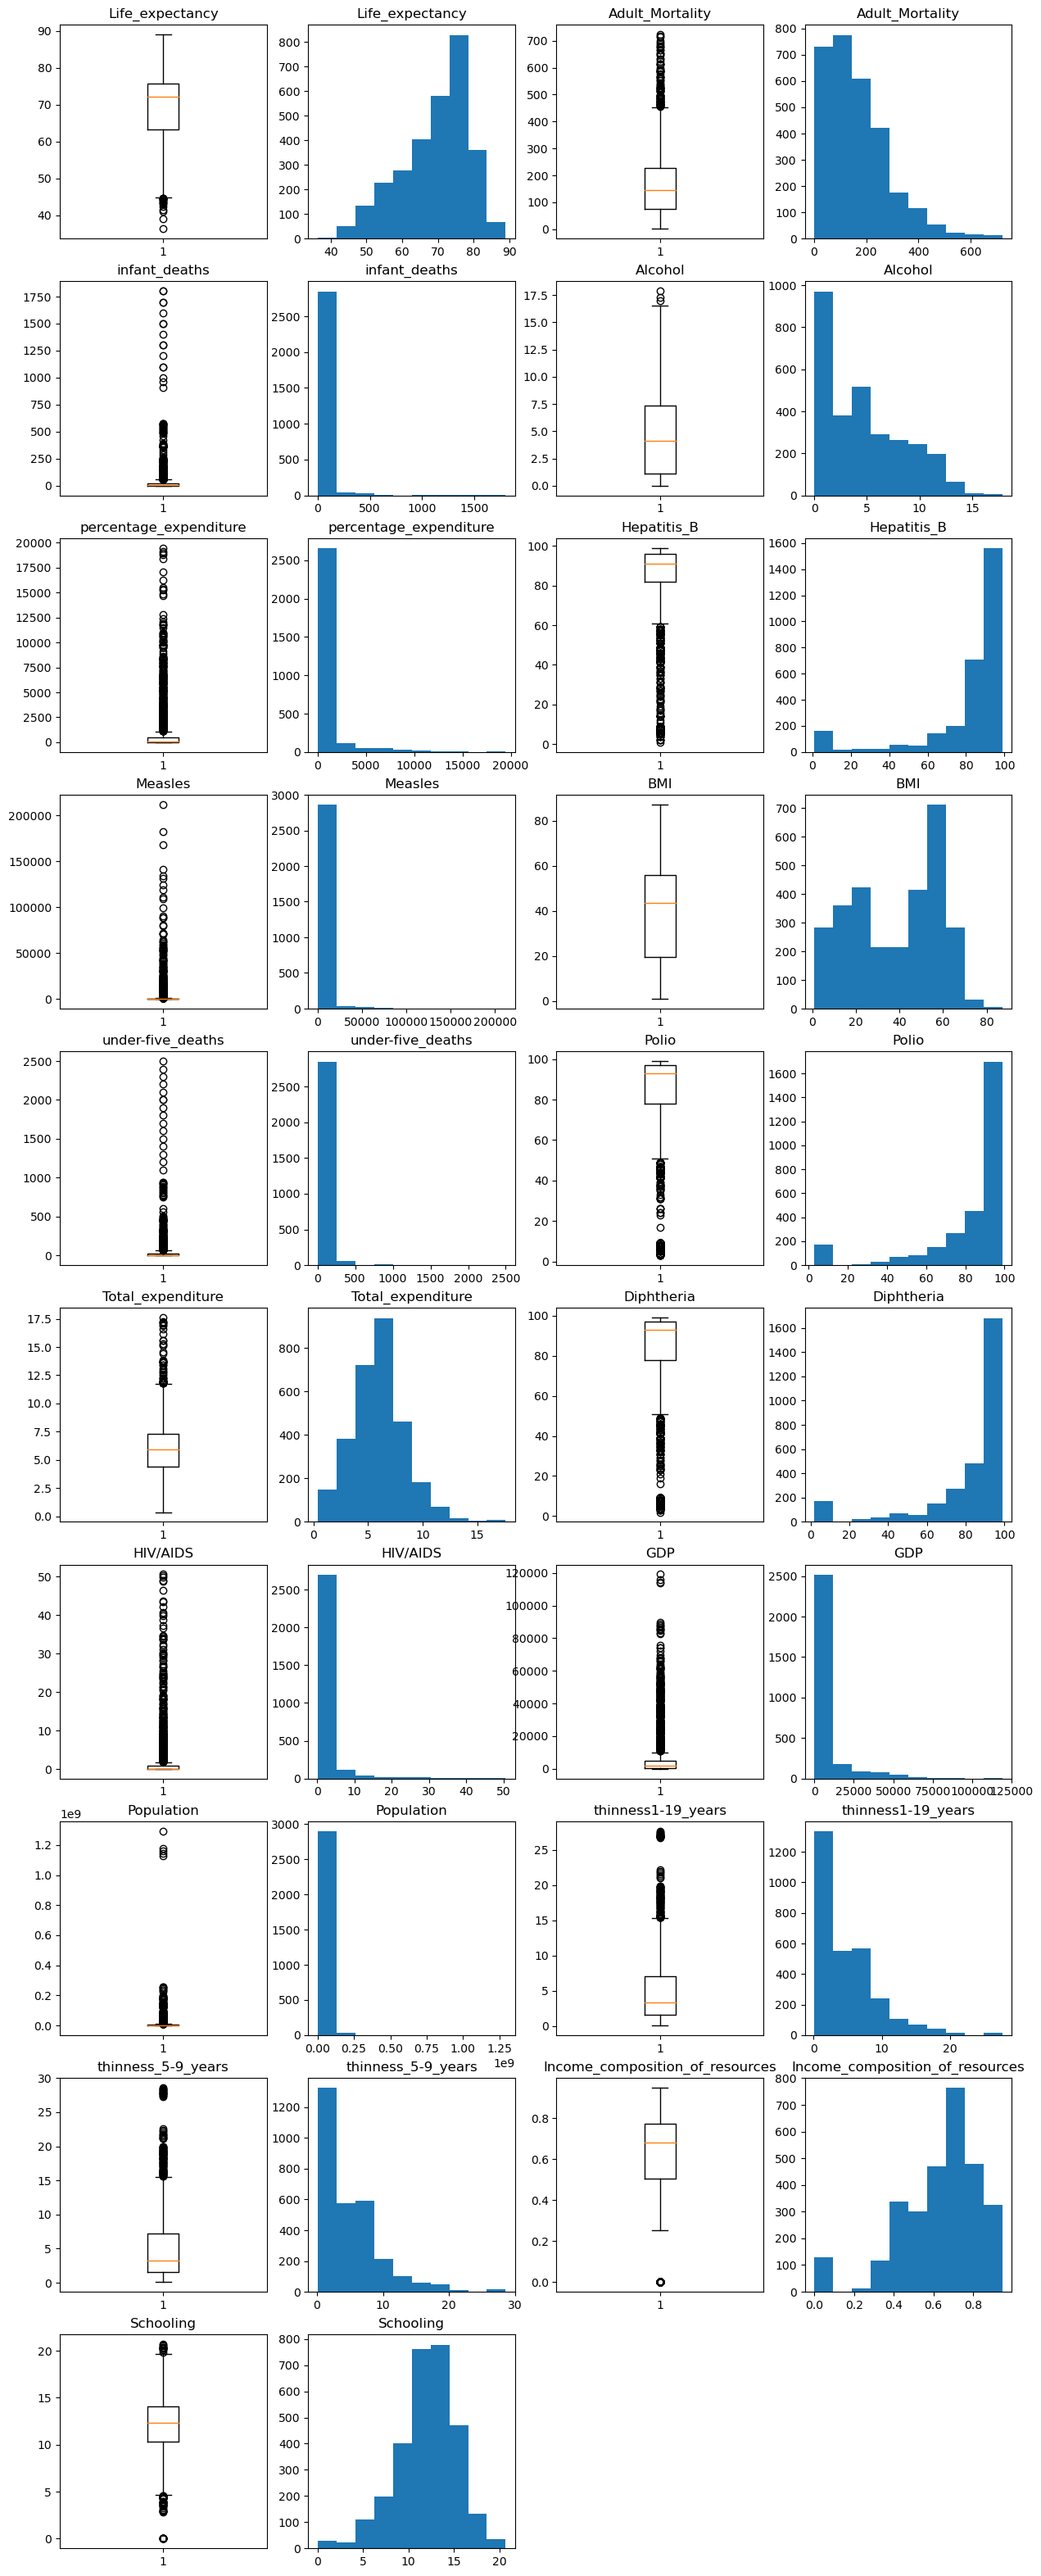

In [56]:
cont_vars = list(df.columns)[3:]
plt.figure(figsize=(15, 40))
i = 0
for col in cont_vars:
    i += 1
    plt.subplot(10, 4, i)
    plt.boxplot(df[col])
    plt.title(col)
    i += 1
    plt.subplot(10, 4, i)
    plt.hist(df[col])
    plt.title(col)
plt.show()


### Para tratar con los outliers haremos uso de la técnica conocida como Winsorizing (que viene incluída en la librería de SciPy)
### Para comprobar su efectividad, graficaremos el boxplot antes y después de aplicar esta técnica

In [57]:
from scipy.stats.mstats import winsorize

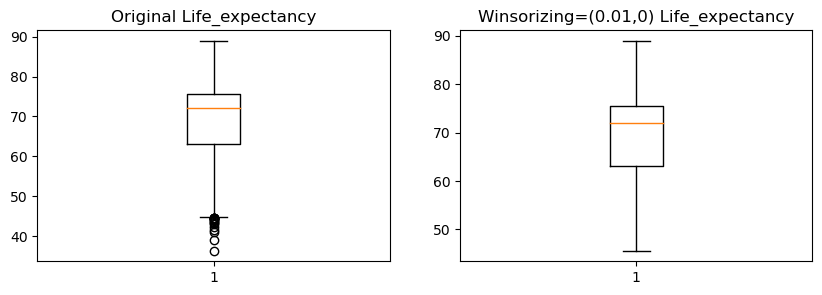

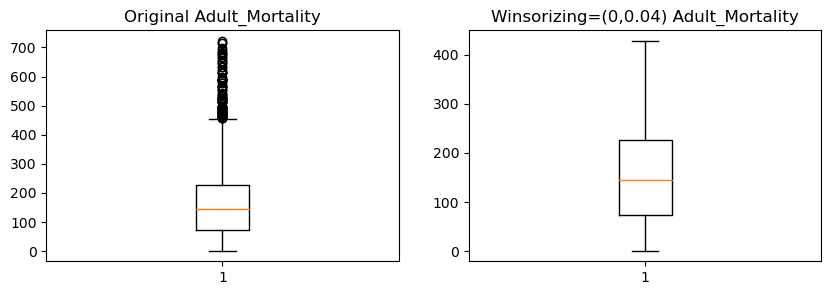

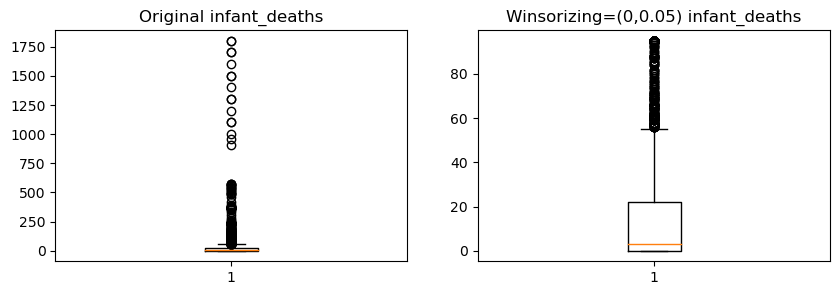

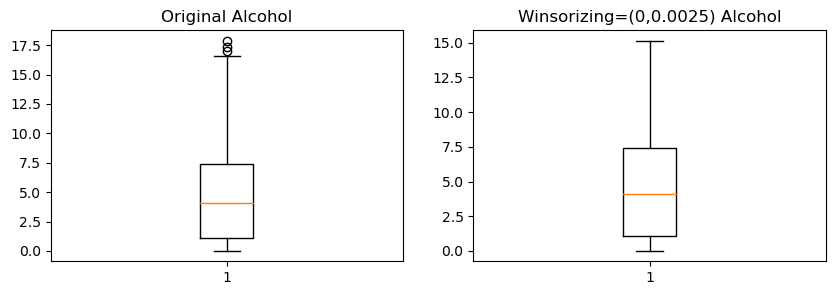

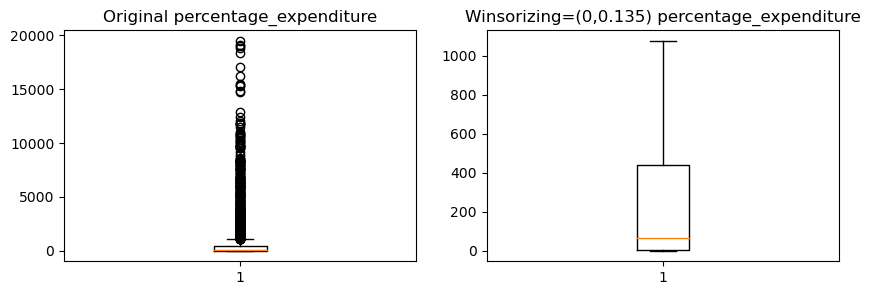

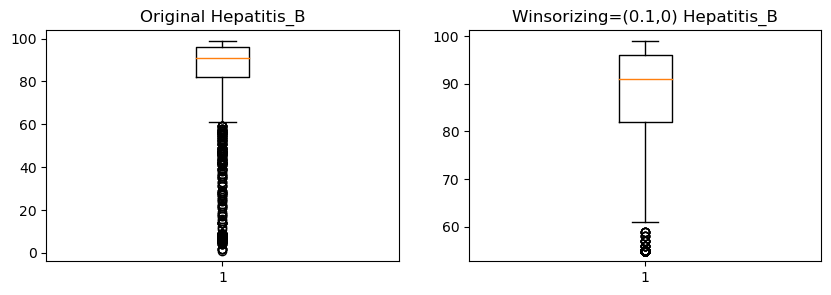

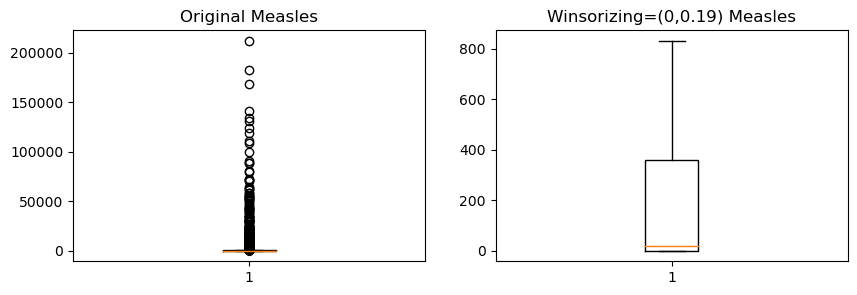

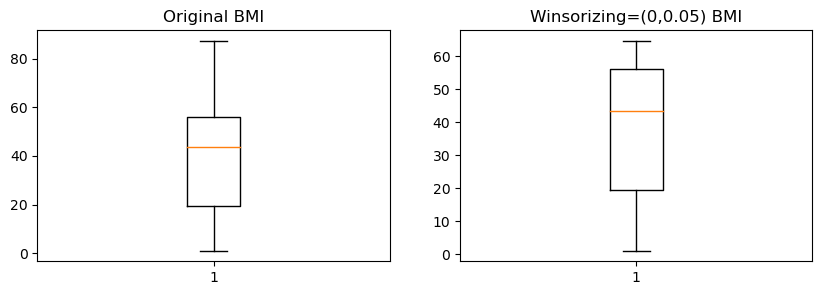

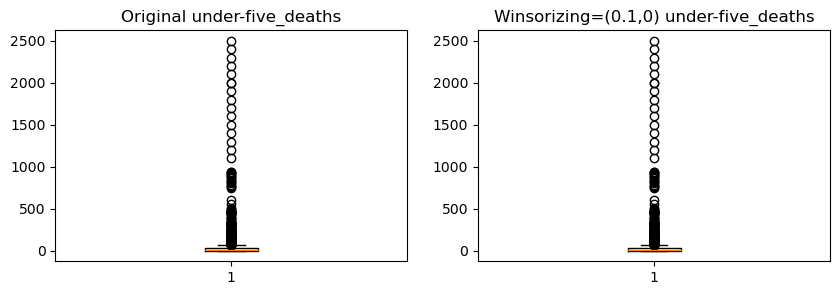

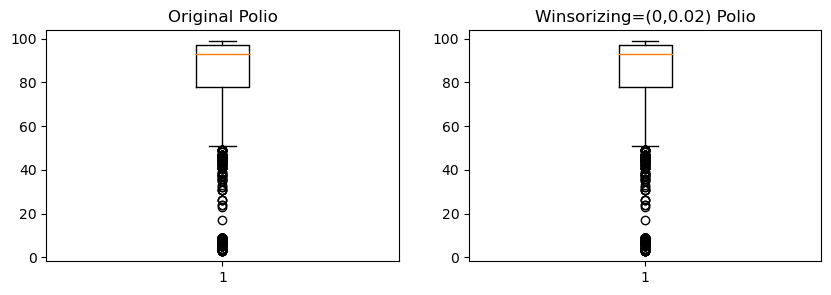

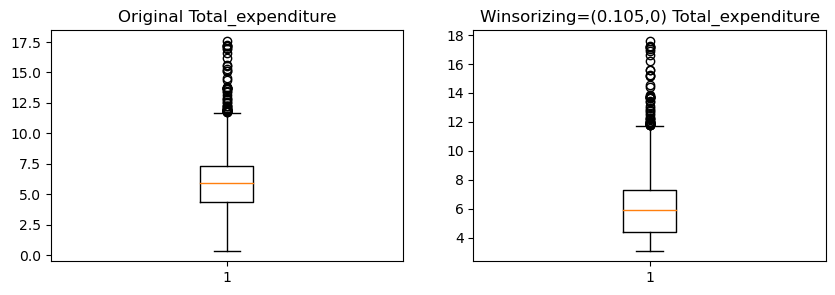

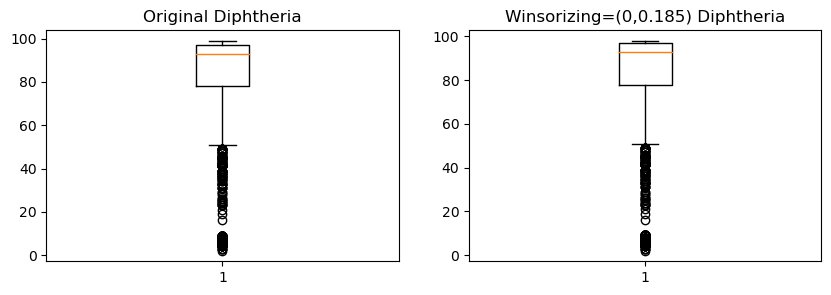

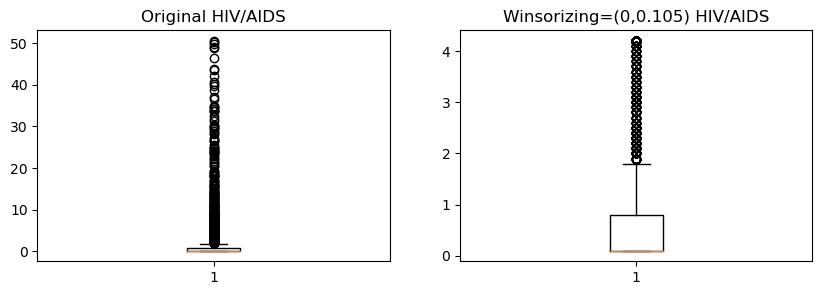

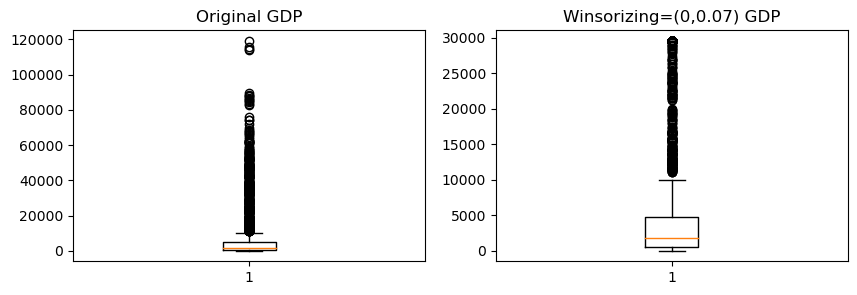

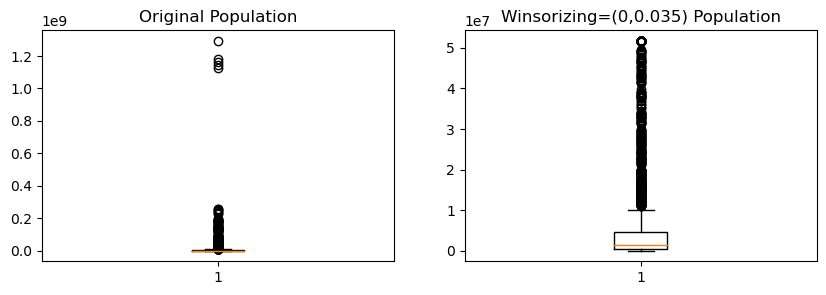

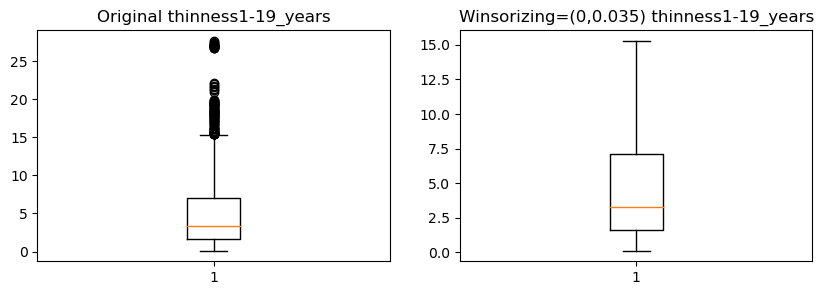

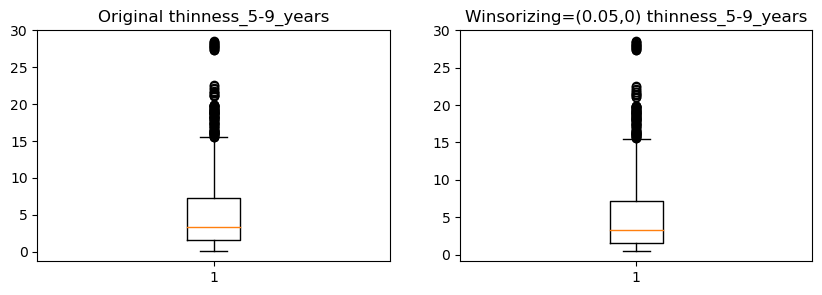

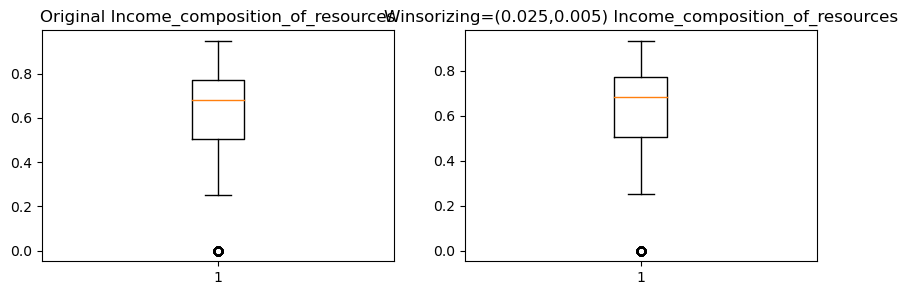

In [58]:
def wins_col(col, lower_limit=0, upper_limit=0):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    plt.figure(figsize=(10,3))
    plt.subplot(121)
    plt.boxplot(df[col])
    plt.title('Original {}'.format(col))
    plt.subplot(122)
    plt.boxplot(wins_data)
    plt.title('Winsorizing=({},{}) {}'.format(lower_limit, upper_limit, col))
    plt.show()
    df[col] = wins_data # Reemplazo los valores de mi DF con el resultado del proceso
wins_dict = {}
wins_col(cont_vars[0], lower_limit=.01)
wins_col(cont_vars[1], upper_limit=.04)
wins_col(cont_vars[2], upper_limit=.05)
wins_col(cont_vars[3], upper_limit=.0025)
wins_col(cont_vars[4], upper_limit=.135)
wins_col(cont_vars[5], lower_limit=.1)
wins_col(cont_vars[6], upper_limit=.19)
wins_col(cont_vars[7], upper_limit=.05)
wins_col(cont_vars[8], lower_limit=.1)
wins_col(cont_vars[9], upper_limit=.02)
wins_col(cont_vars[10], lower_limit=.105)
wins_col(cont_vars[11], upper_limit=.185)
wins_col(cont_vars[12], upper_limit=.105)
wins_col(cont_vars[13], upper_limit=.07)
wins_col(cont_vars[14], upper_limit=.035)
wins_col(cont_vars[15], upper_limit=.035)
wins_col(cont_vars[16], lower_limit=.05)
wins_col(cont_vars[17], lower_limit=.025, upper_limit=.005)

# Exploración de datos <a name="explora"></a>

# 1. ¿Cómo ha evolucionado la expectativa de vida a nivel mundial en los últimos años y qué factores podrían estar impulsando estos cambios?
### Grafiquemos la evolución de la expectativa de vida a nivel mundial a través de los años

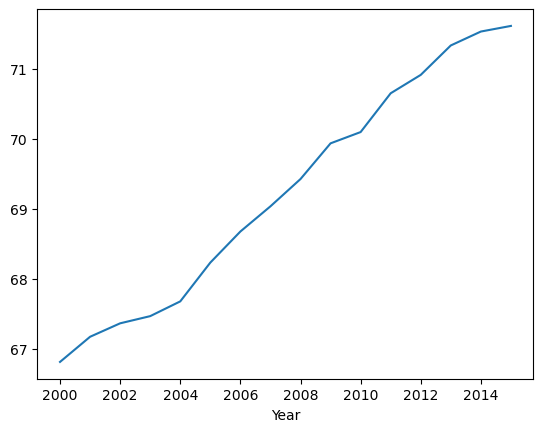

In [59]:
df_grouped = df.groupby('Year')['Life_expectancy'].mean()
df_grouped.plot()
plt.show()

Al visualizar los resultados en un gráfico de línea, observamos que la esperanza de vida ha aumentado de manera sostenida desde el 2000 al 2014. Esto sugiere que, en general, la salud y la longevidad de la población mundial han mejorado en los últimos años.

Es importante tener en cuenta, sin embargo, que este gráfico solo nos proporciona una visión general de la tendencia y no nos permite determinar con certeza qué factores específicos han contribuido a este aumento de la expectativa de vida.

Hay varios factores que podrían estar contribuyendo a este aumento en la esperanza de vida, como el acceso a servicios de salud de alta calidad, el avance de la medicina y la tecnología médica, y el cambio en los estilos de vida hacia opciones más saludables. A medida que sigamos explorando nuestro DataSet, veremos diversos factores que influyen en este aumento.

# 2. ¿Cuáles son los países con la expectativa de vida más alta y cuáles tienen la más baja, y qué factores podrían estar influyendo en esta diferencia?

In [60]:
# Agrupamos por país y calculamos la expectativa de vida promedio
df_grouped = df.groupby('Country')['Life_expectancy'].mean()
df_sorted = df_grouped.sort_values(ascending=False)
print(df_sorted)

Country
Japan                       82.53750
Sweden                      82.51875
Iceland                     82.44375
Switzerland                 82.33125
France                      82.21875
                              ...   
Malawi                      50.37500
Angola                      49.03750
Lesotho                     48.92500
Central African Republic    48.51250
Sierra Leone                47.51875
Name: Life_expectancy, Length: 193, dtype: float64


- Los 5 países con mayor expectativa de vida son: Japón, Suecia, Islandia, Suiza y Francia.
- Los 5 países con menor expectativa de vida son: Malawi, Angola, Lesotho, República Centroafricana y Sierra Leone

Ahora, analicemos que variables están correlacionadas con la expectativa de vida:

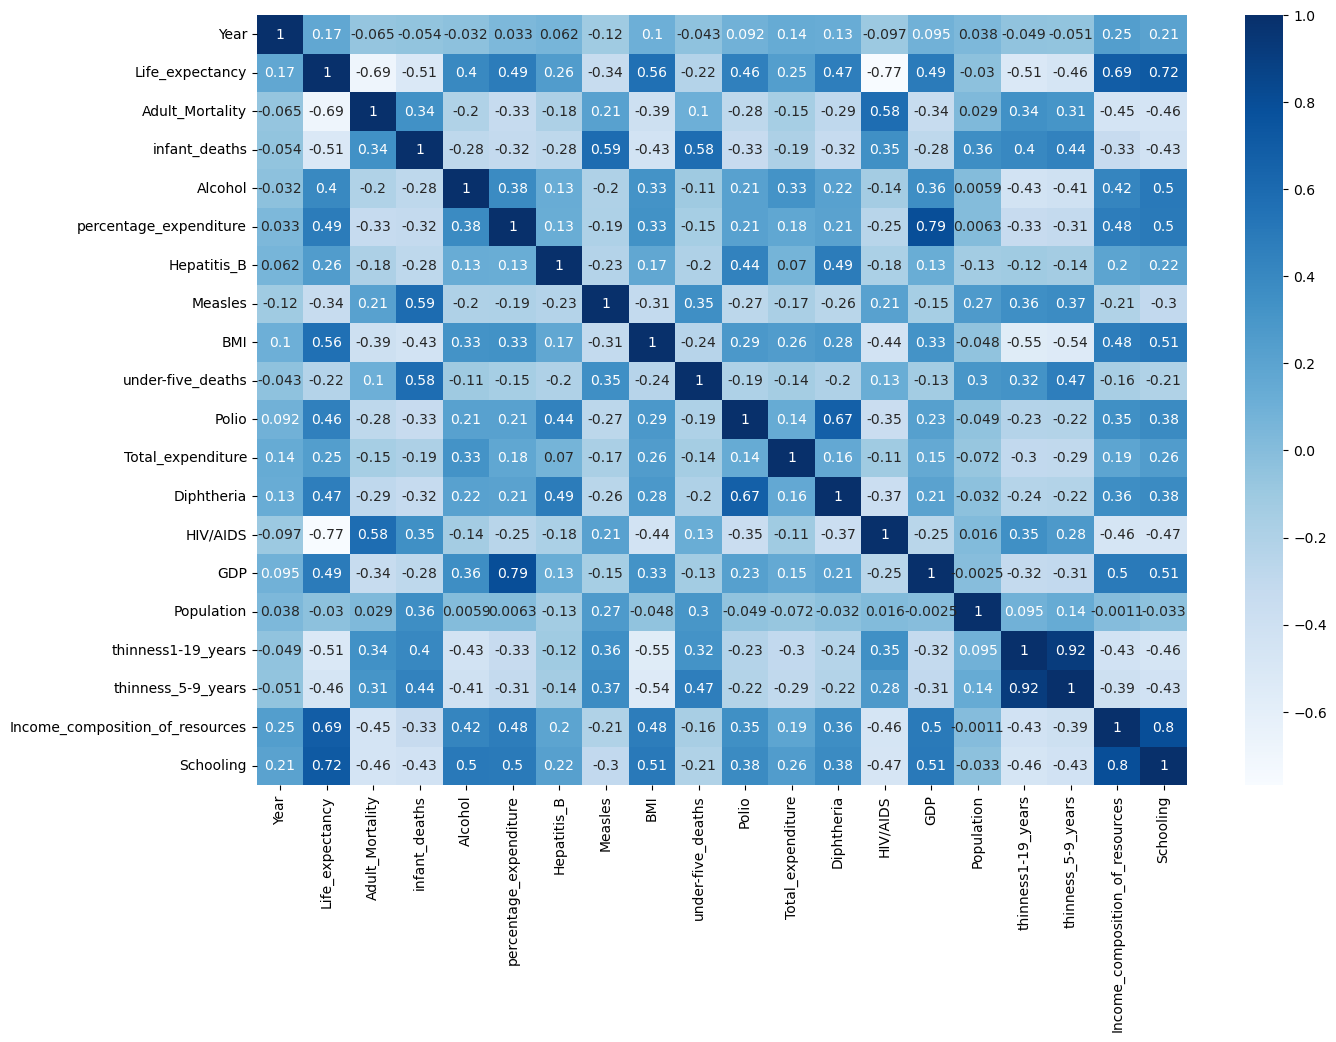

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

Analizando la matriz de correlaciones, podemos ver que la expectativa de vida tiene mayor correlación con las siguientes variables:
- BMI
- Polio y difteria
- GDP
- HIV
- Delgadez (thinness 1-19 years, thinness 5-9 years)
- Income
- Schooling

### BMI:
El índice de masa corporal (BMI, por sus siglas en inglés) es una medida utilizada para evaluar el peso corporal de una persona en relación con su estatura. Se calcula dividiendo el peso corporal en kilogramos por el cuadrado de la estatura en metros. El BMI se utiliza a menudo como una medida indirecta de la grasa corporal y se considera un indicador de riesgo de enfermedad para las personas con sobrepeso o obesidad.

El BMI puede ser utilizado para evaluar el riesgo de enfermedad relacionada con el peso y para identificar a las personas que podrían beneficiarse de intervenciones para mejorar su salud y prevenir enfermedades crónicas.

### Polio y Difteria:
Estas variables representan la cobertura de vacunación contra la poliomielitis y la difteria (porcentaje de niños que han recibido una o más dosis de vacuna contra la polio y la difteria en un determinado período de tiempo)

Ambas enfermedades son mortales, y son evitables mediante vacunas.

### GDP:
La variable de producto interno bruto (GDP en inglés) se utiliza para medir el tamaño de la economía de un país. El PIB es una medida de la producción total de bienes y servicios de un país durante un período de tiempo determinado, normalmente un año. Se calcula sumando el valor de todos los bienes y servicios finales producidos en el país, incluyendo la producción del sector privado, el sector público y el sector externo.

El PIB es una medida comúnmente utilizada para comparar el tamaño de las economías de diferentes países y evaluar su nivel de desarrollo económico.

### HIV:
La variable de infección por el virus de la inmunodeficiencia humana (VIH) representa el porcentaje de personas en un determinado país o región que están infectadas con el VIH
Una correlación negativa entre el VIH y la esperanza de vida significa que, a medida que aumenta la prevalencia del VIH, disminuye la esperanza de vida

### Delgadez:
Los indicadores thinness 1-19 years y thinness 5-9 years se utiliza a menudo para evaluar el estado nutricional de la población infantil y como un indicador de la desnutrición crónica en los países. Se cree que la desnutrición crónica en la infancia puede tener efectos a largo plazo en la salud y el desarrollo, incluyendo una mayor vulnerabilidad a enfermedades y un menor rendimiento escolar. Por lo tanto, este indicador es importante para evaluar el bienestar y el desarrollo de los niños y niñas en todo el mundo.

### Income:
Analizaremos esta correlación en detalle en los próximos items.

### Schooling:
A medida que aumenta el nivel de escolarización, tiende a aumentar también la esperanza de vida.
Un mayor nivel educativo está asociado a un mejor acceso a la atención sanitaria y a otros recursos que promueven la salud. Es más probable que las personas con estudios comprendan la importancia de las revisiones periódicas y los cuidados preventivos, y que dispongan de los medios económicos y los conocimientos necesarios para acceder a los servicios sanitarios. En consecuencia, es más probable que las personas con un mayor nivel educativo mantengan una buena salud y tengan una vida más larga.

# 3. ¿Qué otras variables del dataset tienen una correlación positiva o negativa?

### Continuando con el análisis de la matriz de correlaciones:

- Income_Comp_Of_Resources está correlacionada con Schooling (0.8)

    La columna "income_comp_of_resources" corresponde al Índice de Desarrollo Humano en función de la composición de los recursos (es un índice que va de 0 a 1). Dicho índice es una medida resumida de los logros medios en las dimensiones clave del desarrollo humano: una vida larga y saludable, tener conocimientos y un nivel de vida digno. Es la media de los índices de cada una de estas tres dimensiones.
    De esta correlación, podemos inferir que a medida que aumenta la escolaridad, aumenta el índice de desarrollo humano, ya que la escolaridad es una parte de dicho índice.

- thinness_1to19_years y thinness_5to9_years están correlacionadas (0.94)
    
    Como era de esperarse, la delgadez de una persona entre los 5 y 9 años está relacionada con la delgadez entre el año y los 19 años.

- Polio y Diphtheria están correlacionadas (0.67)
    
    Ambas columnas indican el porcentaje de inmunización de la población. Si bien no es posible determinar por qué están correlacionadas sin disponer de más información, podemos suponer que posiblemente se realicen campañas de vacunación para ambas enfermedades, lo que termina generando una correlación entre ambos porcentajes.

- Percentage_Exp y GDP están correlacionadas (0.9)
    
    La columna "Percentage_exp" indica el Gasto sanitario en porcentaje del Producto Interior Bruto per cápita. Esta correlación parece implicar que los países con mayor PBI son los que también realizan mayores gastos sanitarios.

- Income_Comp_Of_Resources y Life_Expectancy están correlacionadas (0.69)
    
   Esta correlación parece indicar que a mayor indice de desarrollo humano, mayor esperanza de vida.


- Life_Expectancy y Schooling están correlacionadas (0.71)
    
    Analizaremos esta correlación en detalle en el punto siguiente (4. ¿Cuál es el impacto de la escolarización en la esperanza de vida?)

- Infant_Deaths y Under_Five_Deaths están correlacionadas (1). 
    
    Obviamente estas dos variables están correlacionadas (mortalidad infantil y mortalidad de menores de 5 años)

- HIV tiene una correlación negativa con Life_Expectancy (-0.56)

    Una correlación negativa entre el VIH y la esperanza de vida significa que, a medida que aumenta la prevalencia del VIH, disminuye la esperanza de vida. Esto podría deberse a varios factores.
    
    Una posible explicación es que el VIH es una infección que puede provocar una inmunodeficiencia grave, haciendo que los individuos sean más susceptibles a otras infecciones y enfermedades. A medida que aumenta la prevalencia del VIH, más individuos pueden desarrollar inmunodeficiencia, lo que conduce a tasas más altas de otras infecciones y enfermedades y, en última instancia, a una disminución de la esperanza de vida.

    Otra posible explicación es que el VIH suele asociarse a la estigmatización y la discriminación, lo que puede reducir el acceso a la atención sanitaria y otros servicios. Esto puede dificultar que las personas con VIH reciban el tratamiento y el apoyo que necesitan, lo que conduce a peores resultados sanitarios y, potencialmente, a una menor esperanza de vida.

    Además, la disponibilidad y calidad de los servicios de tratamiento y apoyo relacionados con el VIH pueden variar entre los distintos países y territorios, lo que también podría contribuir a las diferencias en la esperanza de vida. En las zonas en las que los servicios de tratamiento y apoyo relacionados con el VIH son limitados o de mala calidad, las personas con HIV pueden tener más probabilidades de experimentar peores resultados sanitarios y una esperanza de vida más corta.

    En general, es probable que haya una serie de factores que contribuyan a la correlación negativa entre el VIH y la esperanza de vida, y sería necesario seguir investigando para comprender plenamente esta relación.

- Adult_Mortality tiene una correlación negativa con Life_Expectancy (-0.7)

    Una correlación negativa entre la mortalidad adulta y la esperanza de vida significa que a medida que aumentan las tasas de mortalidad adulta, la esperanza de vida tiende a disminuir.

    Una posible explicación es que las elevadas tasas de mortalidad adulta pueden ser indicativas de malas condiciones de salud y de vida en una población concreta. Las personas expuestas a factores como una nutrición deficiente, una atención sanitaria inadecuada y peligros medioambientales pueden tener más probabilidades de desarrollar problemas de salud y morir prematuramente.

    La relación entre la mortalidad adulta y la esperanza de vida también puede verse influida por la estructura por edades de una población. Las poblaciones con una elevada proporción de personas mayores pueden tener tasas de mortalidad adulta más bajas, pero también una esperanza de vida menor debido a los efectos del envejecimiento.


# 4. ¿Cuál es el impacto de la escolarización en la esperanza de vida?

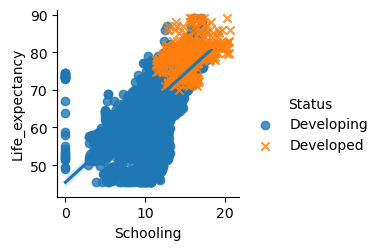

In [62]:
sns.pairplot(df, x_vars=["Schooling"], y_vars=["Life_expectancy"],
             hue="Status",markers=["o", "x"], kind="reg")

A medida que aumenta el nivel de escolarización, tiende a aumentar también la esperanza de vida. Este efecto se hace más evidente en países en desarrollo que en los desarrollados.

Un mayor nivel educativo está asociado a un mejor acceso a la atención sanitaria y a otros recursos que promueven la salud. Es más probable que las personas con estudios comprendan la importancia de las revisiones periódicas y los cuidados preventivos, y que dispongan de los medios económicos y los conocimientos necesarios para acceder a los servicios sanitarios. En consecuencia, es más probable que las personas con un mayor nivel educativo mantengan una buena salud y tengan una vida más larga.

La educación puede proporcionar a las personas los conocimientos y habilidades necesarios para llevar un estilo de vida más saludable. Es más probable que las personas con estudios comprendan la importancia de factores como una dieta sana y la práctica regular de ejercicio, y que dispongan de los conocimientos y recursos necesarios para incorporar estos comportamientos a su vida cotidiana. Esto podría mejorar la salud y alargar la vida.

Además, la educación también puede estar asociada a otros factores que pueden afectar a la salud y la esperanza de vida, como los ingresos, el apoyo social y las condiciones ambientales. Un mayor nivel educativo puede asociarse a unos ingresos más elevados, que pueden proporcionar a las personas un mayor acceso a recursos que favorezcan la salud. La educación también puede estar asociada a redes sociales y sistemas de apoyo más fuertes, que pueden proporcionar a las personas un apoyo emocional y práctico que puede mejorar los resultados en materia de salud.

En general, es probable que haya una serie de factores que contribuyan a la correlación positiva entre la esperanza de vida y la escolarización, y sería necesario seguir investigando para comprender plenamente esta relación.

# 5. ¿Tiene la esperanza de vida una relación positiva o negativa con el consumo de alcohol?

<AxesSubplot:xlabel='Alcohol', ylabel='Life_expectancy'>

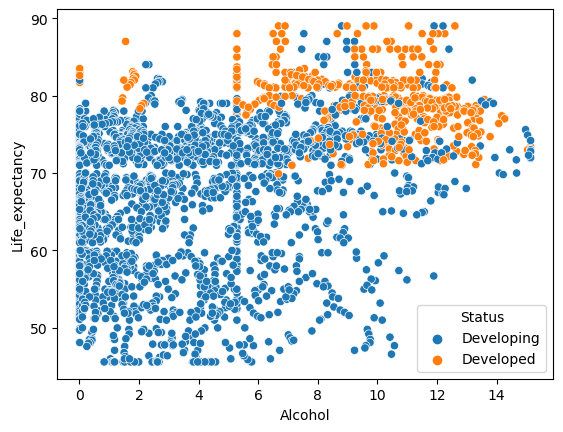

In [63]:
sns.scatterplot(data=df, x="Alcohol", y="Life_expectancy", hue="Status")

La columna "Alcohol", indica el consumo en litros per cápita de alcohol.
Como vimos en la matriz de correlaciones, el alcoholistmo y la esperanza de vida no están fuertemente correlacionados (0.39), tanto en países en desarrollo como en países desarrollados.

Una posible explicación de la falta de correlación entre alcoholismo y esperanza de vida es que el alcoholismo es sólo uno de los muchos factores que pueden afectar a la salud y la esperanza de vida de una persona. Otros factores como la genética, el estilo de vida y el acceso a la atención sanitaria también pueden influir, y los efectos del alcoholismo sobre la esperanza de vida pueden quedar eclipsados por los efectos de estos otros factores.

Otra posible explicación es que la relación entre alcoholismo y esperanza de vida puede variar en función de la población estudiada. Por ejemplo, en algunas poblaciones, los efectos negativos del alcoholismo sobre la salud pueden verse contrarrestados por otros factores, como el acceso a la atención sanitaria o la elección de estilos de vida saludables. En otras poblaciones, los efectos del alcoholismo pueden ser más pronunciados, dando lugar a una relación más fuerte con la esperanza de vida.

# 6. ¿Los países densamente poblados tienden a tener una menor esperanza de vida?

/var/folders/sf/2l63v9y91j10c82vkhpp_2k40000gn/T/ipykernel_46790/824045544.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = df.groupby(["Country", "Year"])["Life_expectancy", "Population"]


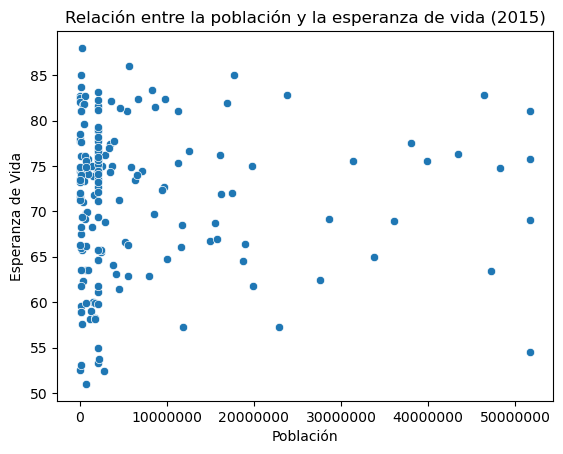

In [64]:
# Agrupo los datos por país y por año
grouped = df.groupby(["Country", "Year"])["Life_expectancy", "Population"]
means = grouped.mean().reset_index()
means = means[means["Year"] == 2015]

# Creo el gráfico para el año 2015
sns.scatterplot(x="Population", y="Life_expectancy", data=means)

# Labels y Titulo
plt.xlabel("Población")
plt.ylabel("Esperanza de Vida")
plt.title("Relación entre la población y la esperanza de vida (2015)")
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

Como vimos en la matriz de correlaciones, no hay una fuerte relación entre la población y la esperanza de vida (-0.0029).

Una posible explicación de la falta de correlación entre población y esperanza de vida es que la relación entre estas dos variables puede variar en función de otros factores, como el nivel de desarrollo económico, el acceso a la atención sanitaria y la calidad de las condiciones de vida de un determinado país.

Por ejemplo, algunos países con poca población pueden tener altos niveles de desarrollo económico, buen acceso a la sanidad y condiciones de vida de alta calidad, lo que podría contribuir a una buena esperanza de vida. Al mismo tiempo, otros países con grandes poblaciones también pueden tener altos niveles de desarrollo económico, un buen acceso a la sanidad y unas condiciones de vida de alta calidad, lo que se traduce en una buena esperanza de vida también en estos países.

Por el contrario, países con poca o mucha población pueden tener un bajo nivel de desarrollo económico, un acceso limitado a la sanidad y unas malas condiciones de vida, lo que podría contribuir a una menor esperanza de vida. En este caso, el tamaño de la población puede no ser el principal determinante de la esperanza de vida, y otros factores como el desarrollo económico, la asistencia sanitaria y las condiciones de vida pueden desempeñar un papel más importante.

En general, es probable que la relación entre población y esperanza de vida sea compleja y pueda variar en función de una serie de factores. La presencia de países con una población pequeña o grande y una buena esperanza de vida sugiere que el tamaño de la población no es el único factor determinante de la esperanza de vida, y que otros factores como el desarrollo económico, la asistencia sanitaria y las condiciones de vida también pueden desempeñar un papel.

# 7. ¿Qué relación hay entre la expectativa de vida y el índice de desarrollo humano (IDH) de un país, y cómo puede el IDH ayudar a predecir la expectativa de vida?

La columna "income_comp_of_resources" corresponde al Índice de Desarrollo Humano en función de la composición de los recursos (es un índice que va de 0 a 1). Dicho índice es una medida resumida de los logros medios en las dimensiones clave del desarrollo humano: una vida larga y saludable, tener conocimientos y un nivel de vida digno. Es la media de los índices de cada una de estas tres dimensiones.

De la matriz de correlaciones del punto anterior, podemos determinar que a mayor indice de desarrollo humano, mayor esperanza de vida.

En general, se espera que una mayor esperanza de vida esté asociada con un mayor IDH, ya que la vida larga y saludable es un componente importante del bienestar de las personas. Sin embargo, es importante tener en cuenta que el IDH es una medida más amplia del bienestar que la esperanza de vida y tiene en cuenta otros factores además de la duración de la vida. Por lo tanto, es posible que la relación entre la esperanza de vida y el IDH no sea lineal y puede variar según el país o la región que se esté considerando.
Podemos graficar ambas variables para apreciar esta correlación:

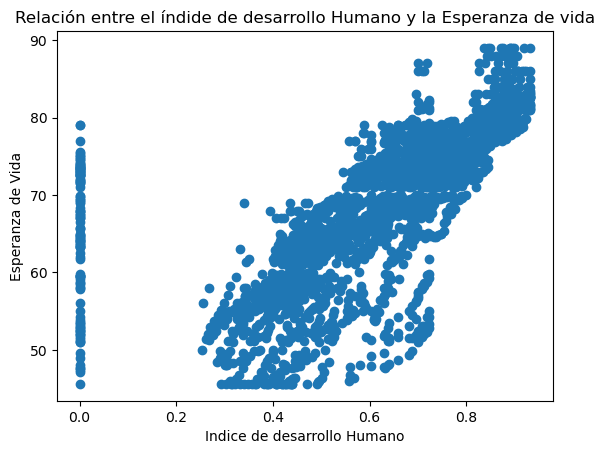

In [65]:
df_subset = df[['Income_composition_of_resources', 'Life_expectancy']].dropna()
plt.scatter(df_subset['Income_composition_of_resources'], df_subset['Life_expectancy'])
plt.xlabel('Indice de desarrollo Humano')
plt.ylabel('Esperanza de Vida')
plt.title('Relación entre el índide de desarrollo Humano y la Esperanza de vida')
plt.show()
#

## Feature Engineering y Reducción de Dimensionalidad

### Codificación de columnas categóricas

In [66]:
status_le = LabelEncoder()
country_le = LabelEncoder()
df['Status'] = status_le.fit_transform(df['Status'])
df['Country'] = country_le.fit_transform(df['Country'])

### Reducción de Dimensionalidad
- El consumo de alcohol, no está relacionado con la expectativa de vida, por lo que podemos eliminar la columna "Alcohol"
- La población del país, tampoco esta fuertemente correlacionada con la expectativa de vida, por lo que podemos eliminar la columna "Population"

In [67]:
df = df.drop(columns=['Alcohol', 'Population'])
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'percentage_expenditure', 'Hepatitis_B', 'Measles',
       'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'thinness1-19_years', 'thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')


### Modelado (Entrenamiento y Validación)

In [68]:
x = df.drop('Life_expectancy',axis=1)
y = df['Life_expectancy']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [69]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [70]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

### Cálculo de R^2

In [71]:
print("R^2 para el modelo: ",r2_score(y_train, y_train_pred))

R^2 para el modelo:  0.8454259825964636


### Cálculo de MAE

In [72]:
# Calculo MAE para Set de Entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
print(mae_train)

2.811881941833216


In [73]:
# Calculo MAE para Set de pruebas
mae_test = mean_absolute_error(y_test, y_test_pred)
print(mae_test)

2.890980779860851


In [74]:
# Cálculo de RMSE (Raiz cuadrada de MAE)
rmse_train = np.sqrt(mae_train)
print(rmse_train)

1.6768667036569174


In [75]:
rmse_test = np.sqrt(mae_test)
print(rmse_test)

1.700288440195031


### Datos reales vs Predicciones

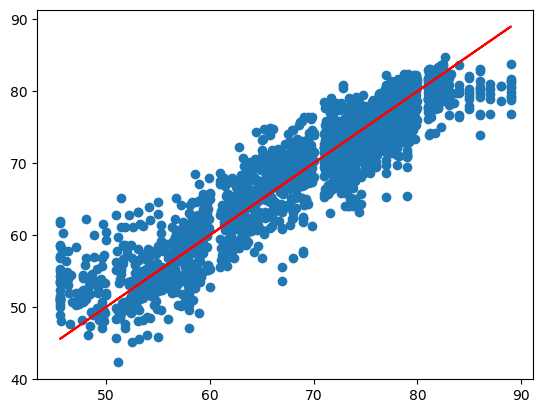

In [76]:
plt.scatter(y_train,y_train_pred)
plt.plot(y_train,y_train,'r')

# Conclusiones:

Después de analizar los datos, podemos concluir que la esperanza de vida está fuertemente influenciada por varios factores, incluyendo el acceso a la atención sanitaria, el nivel de desarrollo económico y la composición de los recursos. La correlación entre la esperanza de vida y el acceso a la atención sanitaria es particularmente fuerte, lo que sugiere que los esfuerzos para mejorar la calidad y accesibilidad de la atención sanitaria podrían tener un impacto significativo en la esperanza de vida de una población.

Sin embargo, también es importante tener en cuenta que la relación entre la esperanza de vida y estos factores puede variar según el país o la región considerada. Por ejemplo, algunos países con poblaciones pequeñas pueden tener altos niveles de desarrollo económico y buen acceso a la atención sanitaria, lo que contribuye a una buena esperanza de vida, mientras que otros países con grandes poblaciones también pueden tener altos niveles de desarrollo económico y acceso a la atención sanitaria, lo que también se traduce en una buena esperanza de vida.

Además, el alcoholismo y la población no parecen estar fuertemente correlacionados con la esperanza de vida, lo que sugiere que otros factores pueden desempeñar un papel más importante en la determinación de la esperanza de vida en estas áreas. La falta de correlación entre la población y la esperanza de vida también puede indicar que el tamaño de la población no es el único factor importante en la determinación de la esperanza de vida, y que otros factores como el desarrollo económico, la asistencia sanitaria y las condiciones de vida también pueden desempeñar un papel clave.

En general, podemos concluir que mejorar el acceso a la atención sanitaria, el nivel de desarrollo económico y la calidad de vida pueden contribuir significativamente a mejorar la esperanza de vida. Sin embargo, es importante tener en cuenta que la relación entre estos factores y la esperanza de vida puede variar según el contexto, y que se necesitan más investigaciones para comprender completamente los factores que influyen en la esperanza de vida.

Con respecto al modelado, en principio, tanto el cálculo de R2 como el gráfico de datos reales vs predicciones parecen indicar que el modelo lineal se comporta bastante bien para este escenario.

No pareciese que el modelo estuviese sub o sobre ajustado, ya que el rendimiento es bastante bueno tanto con los datos de entrenamiento como con los de prueba.

Los datos de MAE tanto para el dataset de prueba como para el de entrenamiento son practicamente iguales (3 años aproximadamente)

Si el modelo estuviese sobreajustado, tendría buen rendimiento en el conjunto de entrenamiento pero pobre rendimiento en el conjunto de prueba. Por otro lado, si el modelo estuviese subajustado, tendría un rendimiento pobre tanto en el conjunto de entrenamiento como en el conjunto de prueba.